# Import, options

In [1]:
import numpy, seaborn, pandas
import matplotlib, matplotlib.pyplot as plt

In [2]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(8, 5), 'svg.fonttype' : 'none'})

In [3]:
file_directory = "/Users/kja11/OneDrive - Menntaský/PostDoc_Hypothermia/in_silico/Python/"

# Data Download

In [4]:
%%time
#data mouse_NPC
df_H3K36me3 = pandas.read_csv(file_directory+'1) input/hNPC_H3K36me3_allPeaks_max20_MACS3.csv',
                               sep = ',')
print(df_H3K36me3.shape)
df_H3K36me3.head()

(17794, 25)
CPU times: total: 31.2 ms
Wall time: 136 ms


,seqnames,start,end,width,strand,width.1,strand.1,Conc,Conc_32,Conc_37,...,geneStart,geneEnd,geneLength,geneStrand,geneId,transcriptId,distanceToTSS,ENSEMBL,SYMBOL,GENENAME
0,chr12,12613568,12613967,400,*,401,*,7.533687,0.0,8.533687,...,12611876,12645108,33233,1,1389,ENST00000228865.3,1692,ENSG00000111269,CREBL2,cAMP responsive element binding protein like 2
1,chr13,100382883,100383282,400,*,401,*,7.416164,0.0,8.416164,...,100368499,100491817,123319,1,5095,ENST00000413170.1,14384,ENSG00000175198,PCCA,propionyl-CoA carboxylase subunit alpha
2,chr19,52623958,52624357,400,*,401,*,7.154194,0.0,8.154194,...,52612378,52618040,5663,2,55769,ENST00000541777.6,-5918,ENSG00000167766,ZNF83,zinc finger protein 83
3,chr1,124450789,124451188,400,*,401,*,7.102199,0.0,8.102199,...,121519345,121568791,49447,1,647121,ENST00000458200.2,2931444,ENSG00000291141,EMBP1,embigin pseudogene 1
4,chr10,33330463,33330862,400,*,401,*,7.061936,0.0,8.061936,...,33201018,33334382,133365,2,8829,ENST00000374823.9,3520,ENSG00000099250,NRP1,neuropilin 1


In [5]:
df.columns

Index(['seqnames', 'start', 'end', 'width', 'strand', 'width.1', 'strand.1',
       'Conc', 'Conc_32', 'Conc_37', 'Fold', 'p.value', 'FDR', 'annotation',
       'geneChr', 'geneStart', 'geneEnd', 'geneLength', 'geneStrand', 'geneId',
       'transcriptId', 'distanceToTSS', 'ENSEMBL', 'SYMBOL', 'GENENAME'],
      dtype='object')

In [6]:
columns = ['Conc', 'Conc_32','Conc_37', 'Fold', 
'p.value', 'FDR', 'annotation', 'geneChr', 'geneStart', 'geneEnd', 'geneLength', 
'geneStrand', 'geneId', 'distanceToTSS', 'SYMBOL', 'GENENAME']

df = df[columns]
df.head()

,Conc,Conc_32,Conc_37,Fold,p.value,FDR,annotation,geneChr,geneStart,geneEnd,geneLength,geneStrand,geneId,distanceToTSS,SYMBOL,GENENAME
0,7.533687,0.0,8.533687,-20.405148,1.764480e-20,1.738648e-15,Promoter (1-2kb),12,12611876,12645108,33233,1,1389,1692,CREBL2,cAMP responsive element binding protein like 2
1,7.416164,0.0,8.416164,-19.528880,2.116609e-18,1.042811e-13,"Intron (ENST00000376279.7/5095, intron 19 of 22)",13,100368499,100491817,123319,1,5095,14384,PCCA,propionyl-CoA carboxylase subunit alpha
2,7.154194,0.0,8.154194,-19.227747,1.512751e-16,4.968680e-12,"Intron (ENST00000702778.1/ENST00000702778.1, i...",19,52612378,52618040,5663,2,55769,-5918,ZNF83,zinc finger protein 83
3,7.102199,0.0,8.102199,-18.824480,9.374397e-16,2.245645e-11,Distal Intergenic,1,121519345,121568791,49447,1,647121,2931444,EMBP1,embigin pseudogene 1
4,7.061936,0.0,8.061936,-18.894174,1.186074e-15,2.245645e-11,5' UTR,10,33201018,33334382,133365,2,8829,3520,NRP1,neuropilin 1


In [10]:
#p.value is probably not adj.p.value

# VolcanoPlot

In [11]:
-numpy.log10(df['p.value']).max()

2.0441449012763475

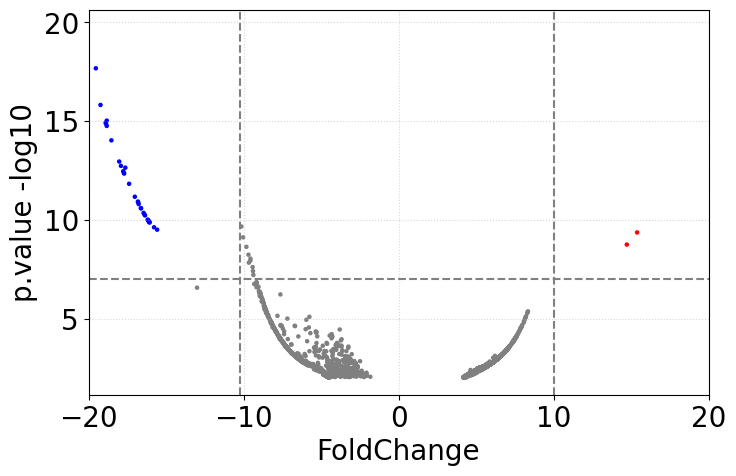

In [73]:
#volcano plot
colors = ['blue' if x < -10.2 and -numpy.log10(y) > 7
          else 'red' if x > 1 and -numpy.log10(y) > 7
          else 'black' if x > -1 and x < 1
          else 'grey' for x, y in zip(df['Fold'], df['p.value'])]

# Plot, after convertion  y to log10(pvalue)
plt.scatter(x=df['Fold'],y=df['p.value'].apply(lambda x:-numpy.log10(x)),s=5,  c=colors) 
plt.xlim(-20, 20)
plt.xlabel("FoldChange")
plt.ylabel("p.value -log10")

plt.axvline(-10.2,color="grey",linestyle="--")
plt.axvline(10,color="grey",linestyle="--")
plt.axhline(7,color="grey",linestyle="--")

title_file = 'volcano_NPC_H3K36me3_MACS3_more_strict'
# plt.savefig(file_directory+'3) output/'+title_file+'.svg')

## Heatmap

In [18]:
df.shape

(17794, 16)

In [74]:
#select the interesting genes
df_hm = df[ (df['Fold'] > 10) | (df['Fold'] < -10.2) ]
df_hm = df_hm[ (df_hm['p.value'] < 10e-7) ]  # = 7 in -log10

print(df_hm.shape)

max_pval = df_hm['p.value'].max()
print(f'highest pvalue is {max_pval}')

df_hm = df_hm[['SYMBOL', 'Fold','p.value']]
df_hm.head()

(37, 16)
highest pvalue is 2.66194856538175e-07


,SYMBOL,Fold,p.value
0,CREBL2,-20.405148,1.764480e-20
1,PCCA,-19.528880,2.116609e-18
2,ZNF83,-19.227747,1.512751e-16
3,EMBP1,-18.824480,9.374397e-16
4,NRP1,-18.894174,1.186074e-15


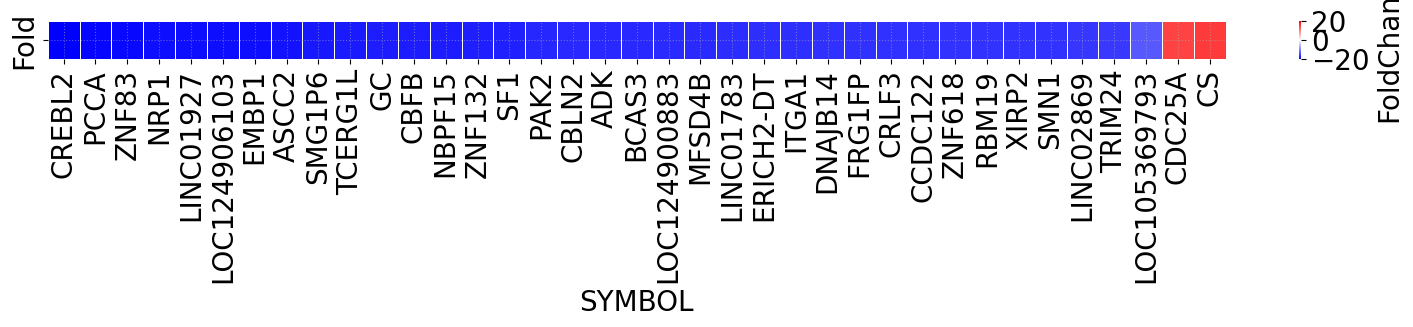

In [61]:
data = df_hm[['SYMBOL','Fold']]
data = data.sort_values(['Fold'], ascending = True)
data
data.set_index('SYMBOL', inplace= True)

plt.subplots(figsize=(19,0.5))
seaborn.heatmap(data.T, annot=False, cmap="bwr", linewidths=.5, center=0, vmin=-20, vmax=20,
               cbar_kws={'label': 'FoldChange'})

title_file = 'Heatmap_NPC_H3K36me3_MACS3_more_strict'
plt.savefig(file_directory+'3) output/'+title_file+'.svg')

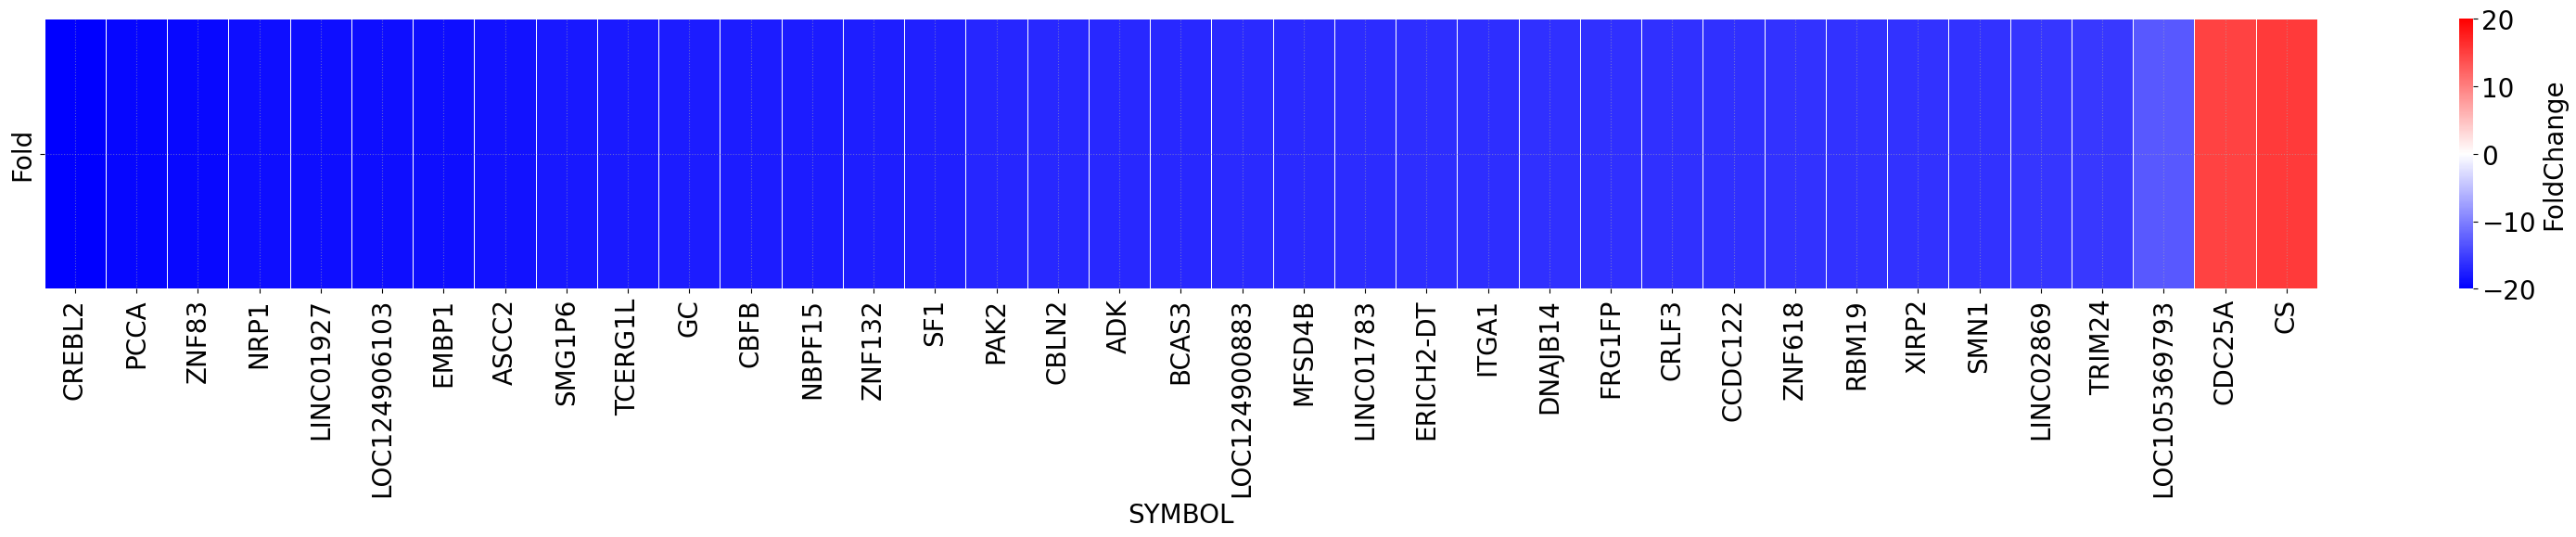

In [75]:
# again bigger, just to get bigger Legend.
plt.subplots(figsize=(32,4))
plt.tight_layout()
seaborn.heatmap(data.T, annot=False, cmap="bwr", linewidths=.5, center=0, vmin=-20, vmax=20,
               cbar_kws={'label': 'FoldChange'})

title_file = 'Heatmap_NPC_H3K36me3_MACS3_legend'
# plt.savefig(file_directory+'3) output/'+title_file+'.svg')

## Comparison results SEACR and MACS3

In [70]:
df_hm_macs3 = df_hm
df_hm_macs3

,SYMBOL,Fold,p.value
0,CREBL2,-20.405148,1.764480e-20
1,PCCA,-19.528880,2.116609e-18
2,ZNF83,-19.227747,1.512751e-16
3,EMBP1,-18.824480,9.374397e-16
4,NRP1,-18.894174,1.186074e-15
5,LINC01927,-18.870846,1.367406e-15
6,LOC124906103,-18.826162,1.739514e-15
7,ASCC2,-18.523770,9.358762e-15
8,SMG1P6,-18.021994,1.103658e-13
9,TCERG1L,-17.908305,1.827081e-13


In [66]:
%%time
#data mouse_NPC
df_seacr = pandas.read_csv(file_directory+'1) input/NPC_H3K36me3_AllPeaks_SEACR.csv',
                               sep = ',')

#select the interesting genes

df_hm2 = df_seacr[ (df_seacr['Fold'] > 1) | (df_seacr['Fold'] < -1) ]
df_hm2 = df_hm2[ (df_hm2['p.value'] < 10e-6) ]

print(df_hm2.shape)

max_pval = df_hm2['p.value'].max()
print(f'highest pvalue is {max_pval}')

df_hm_seacr = df_hm2[['SYMBOL', 'Fold','p.value']]
df_hm_seacr.head()

(35, 23)
highest pvalue is 9.65779871320066e-06
CPU times: total: 93.8 ms
Wall time: 228 ms


,SYMBOL,Fold,p.value
0,SMG1P6,-17.182478,1.322149e-11
1,NBPF15,-16.860628,5.894429e-11
2,CENPE,-10.689641,1.304364e-10
3,NSMAF,-10.539568,2.025052e-10
4,YEATS2,-10.345687,7.394206e-10


In [72]:
# see what are the commun genes
merged_df = pandas.merge(df_hm_macs3, df_hm_seacr, on='SYMBOL', how='inner')
merged_df

,SYMBOL,Fold_x,p.value_x,Fold_y,p.value_y
0,SMG1P6,-18.021994,1.103658e-13,-17.182478,1.322149e-11
1,NBPF15,-17.702601,4.474387e-13,-16.860628,5.894429e-11
2,LINC01783,-16.450446,4.380936e-11,-16.117606,1.013423e-09
